<a href="https://colab.research.google.com/github/HamnahUmmerKK/CognoRise-Infotech/blob/machine-learning/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA LOADING**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Cognorise info tech internship ML/HOUSE PRICE PREDICTION.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**DATA EXPLORATION**

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [7]:
df.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


**CORRELATION**

<Axes: >

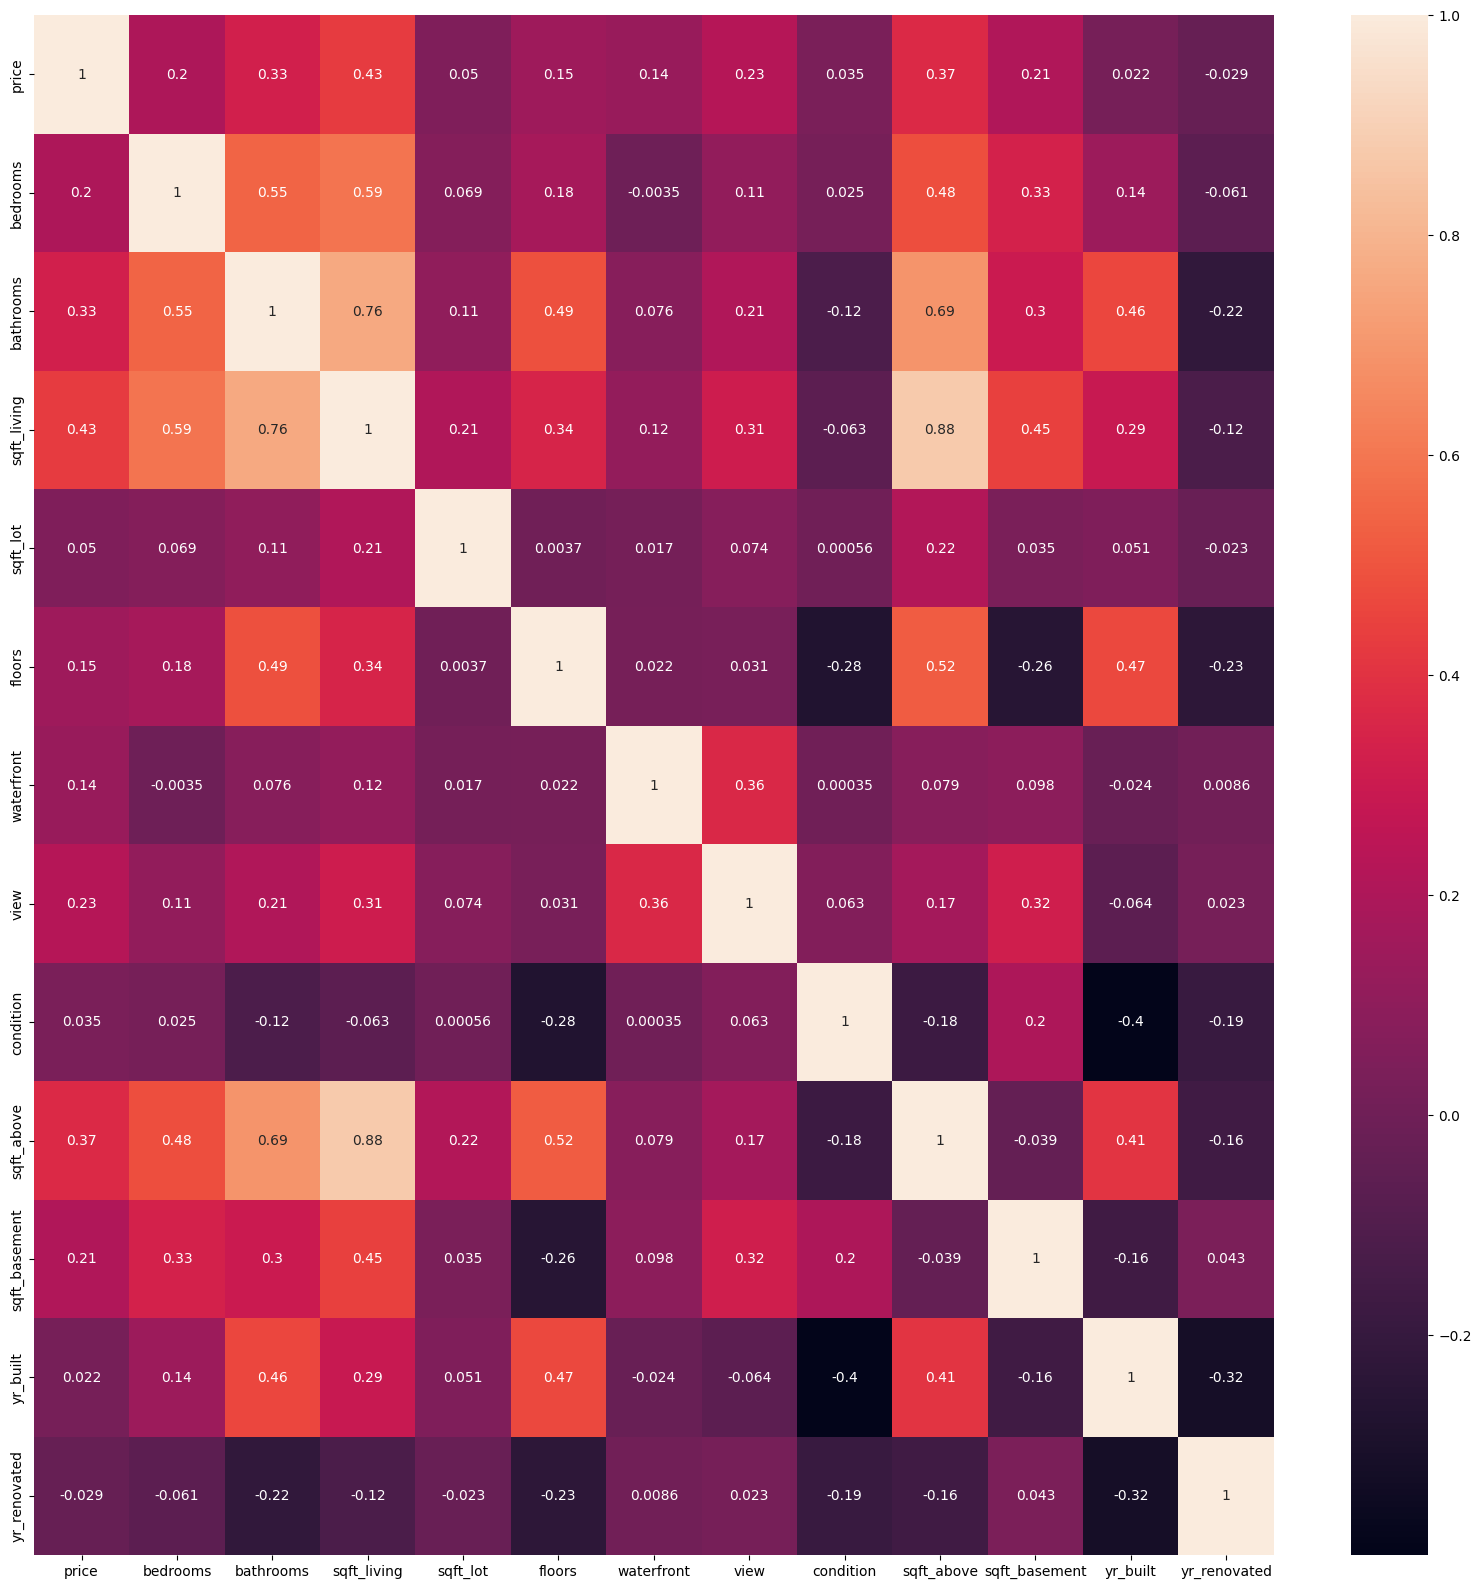

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [9]:
df.drop(['date'],axis=1,inplace=True)

**DATA VISUALIZATION**

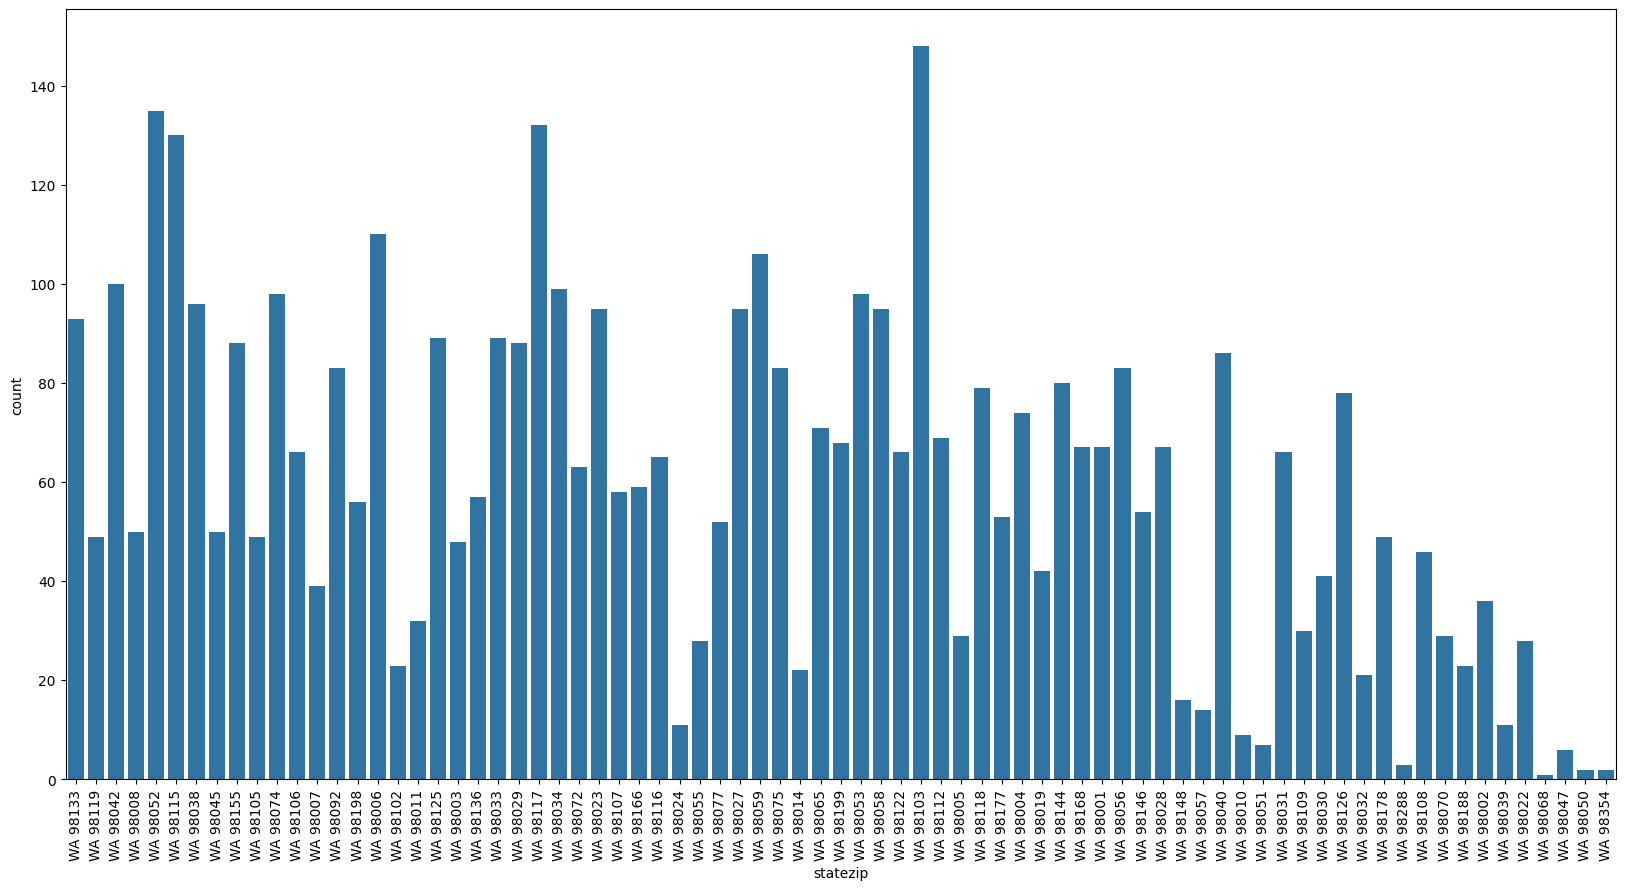

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['statezip'],data=df)
plt.xticks(rotation=90)
pass

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, 'Shoreline'),
  Text(1, 0, 'Seattle'),
  Text(2, 0, 'Kent'),
  Text(3, 0, 'Bellevue'),
  Text(4, 0, 'Redmond'),
  Text(5, 0, 'Maple Valley'),
  Text(6, 0, 'North Bend'),
  Text(7, 0, 'Lake Forest Park'),
  Text(8, 0, 'Sammamish'),
  Text(9, 0, 'Auburn'),
  Text(10, 0, 'Des Moines'),
  Text(11, 0, 'Bothell'),
  Text(12, 0, 'Federal Way'),
  Text(13, 0, 'Kirkland'),
  Text(14, 0, 'Issaquah'),
  Text(15, 0, 'Woodinville'),
  Text(16, 0, 'Normandy Park'),
  Text(17, 0, 'Fall City'),
  Text(18, 0, 'Renton'),
  Text(19, 0, 'Carnation'),
  Text(20, 0, 'Snoqualmie'),
  Text(21, 0, 'Duvall'),
  Text(22, 0, 'Burien'),
  Text(23, 0, 'Covington'),
  Text(24, 0, 'Inglewood-Finn Hill'),
  Text(25, 0, 'Kenmore'),
  Text(26, 0, 'Newcastle

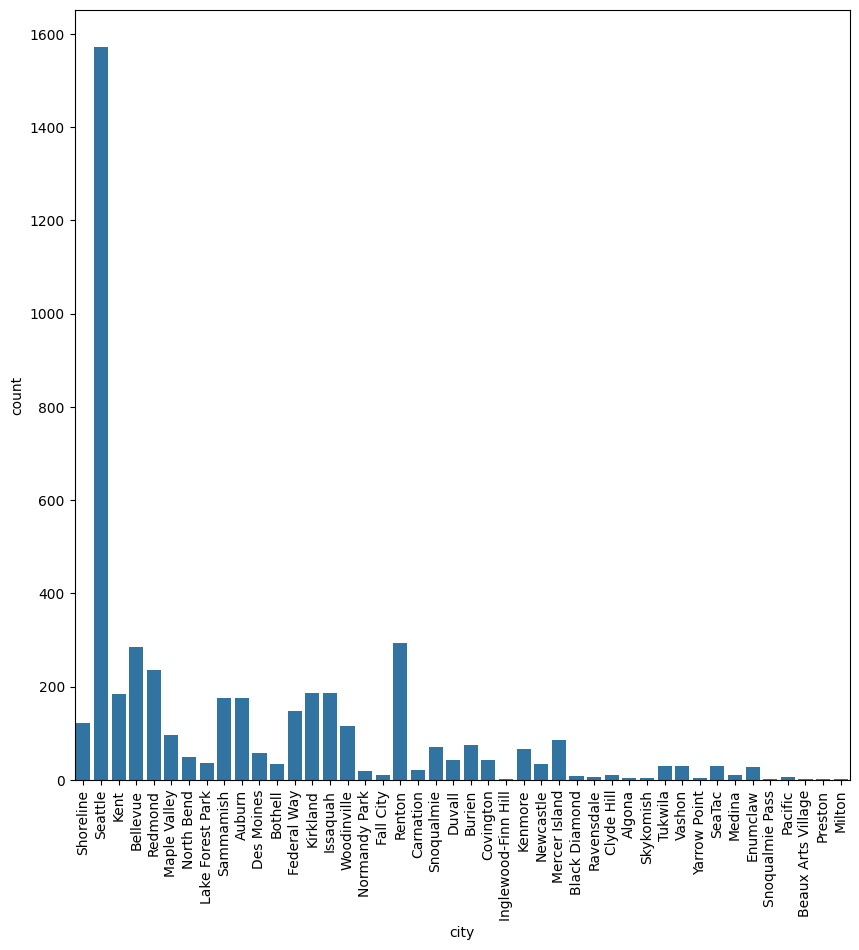

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['city'],data=df)
plt.xticks(rotation=90)

([0], [Text(0, 0, 'USA')])

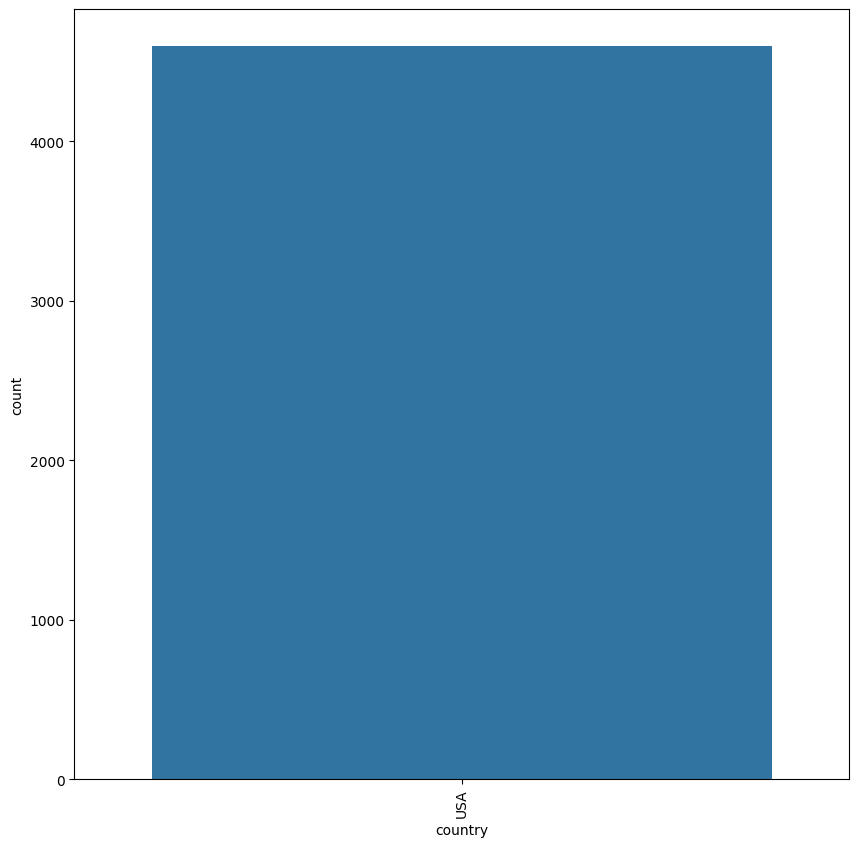

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['country'],data=df)
plt.xticks(rotation=90)

**REGRESSION PLOT**

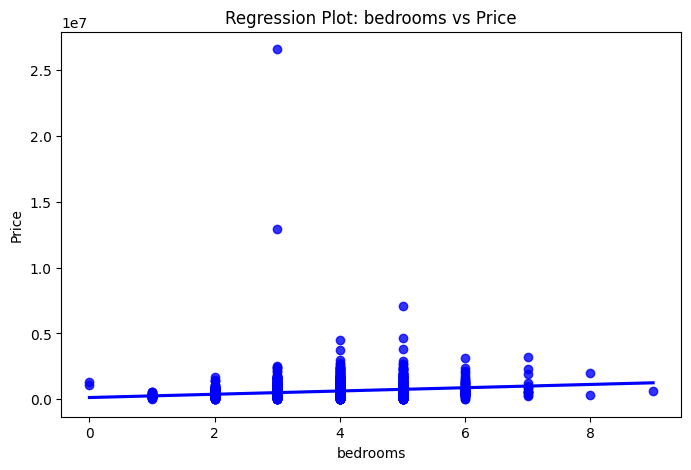

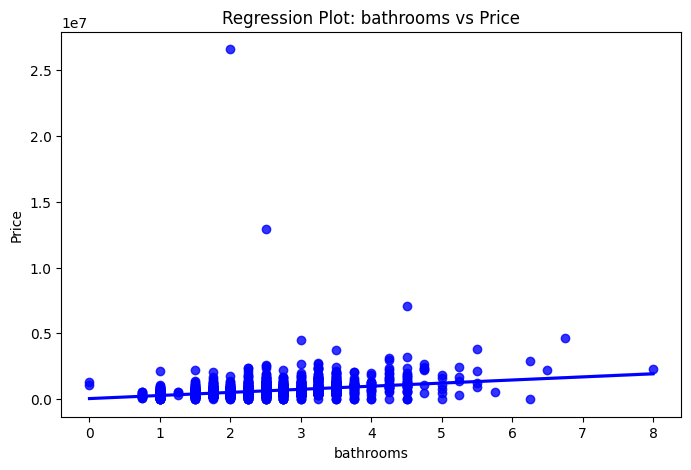

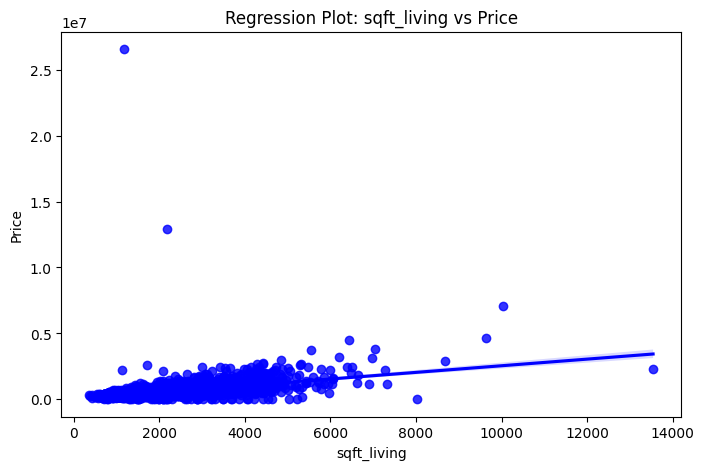

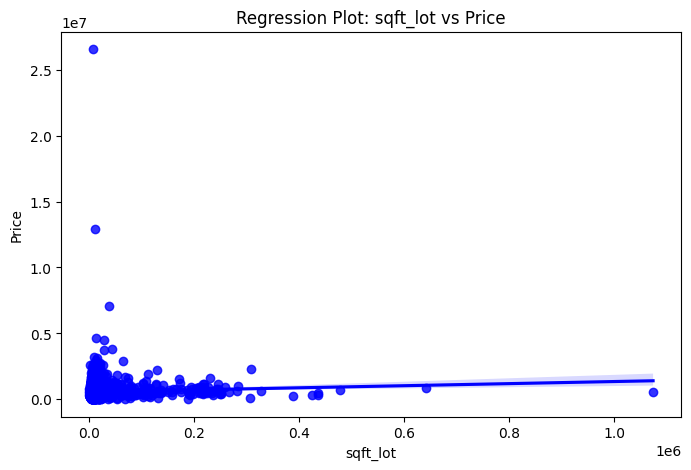

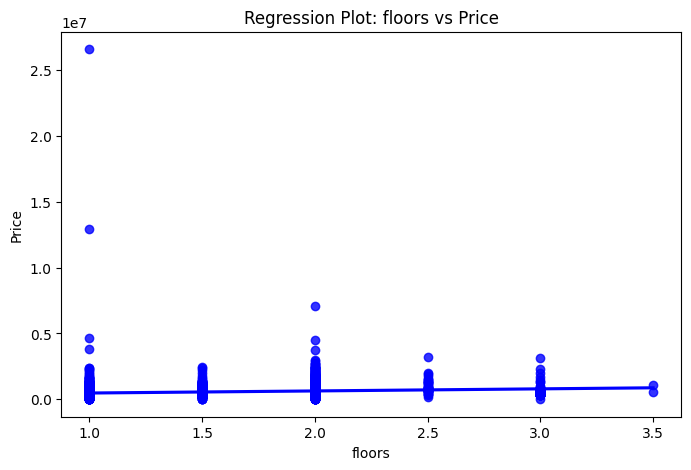

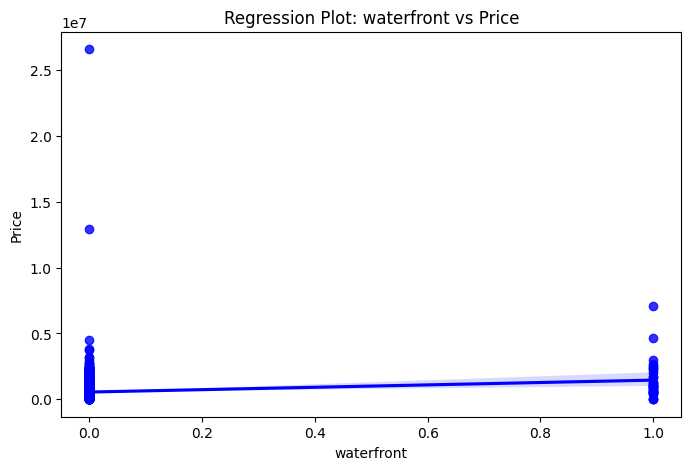

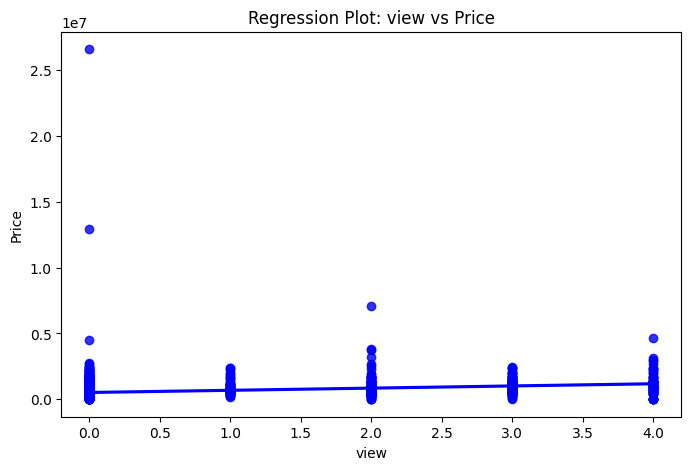

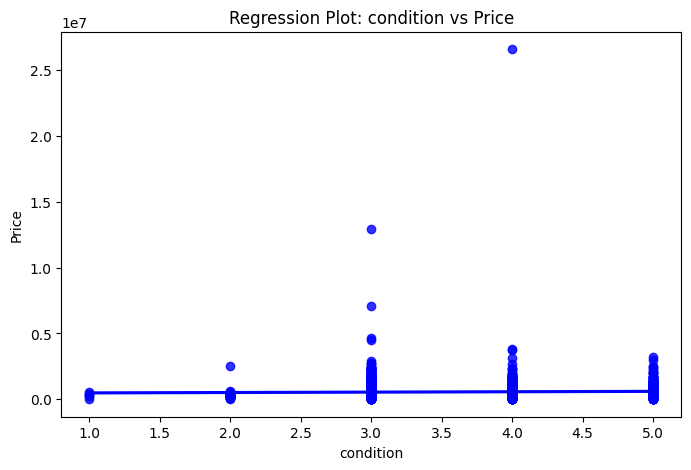

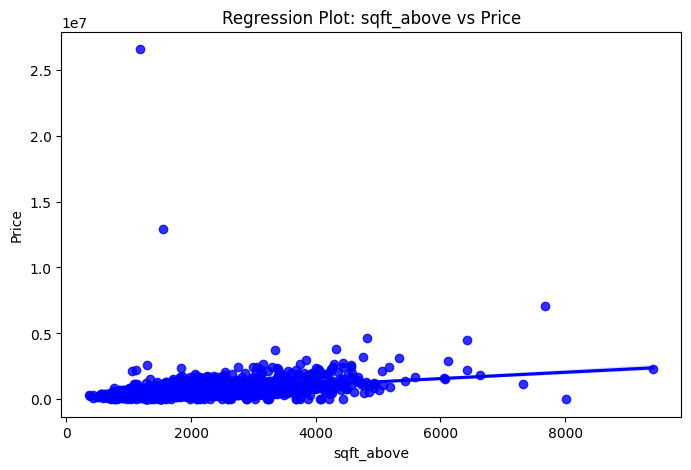

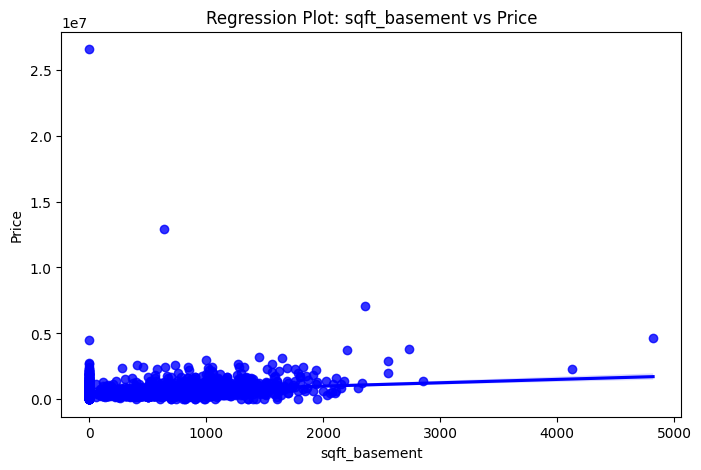

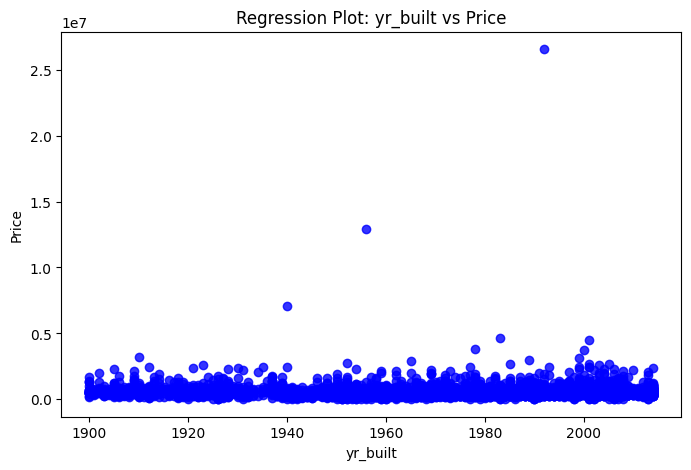

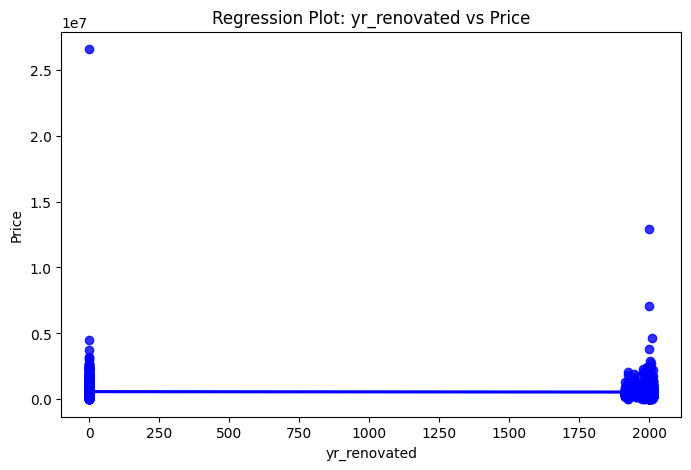

In [22]:

# Assuming df is your DataFrame and y is your target variable
lst = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']  # Removed non-numeric columns

# Example: Assume df is your DataFrame and 'price' is the target variable
y = df['price']

for feature in lst:
    if pd.api.types.is_numeric_dtype(df[feature]):
        plt.figure(figsize=(8, 5))
        sns.regplot(x=df[feature], y=y, color='b')  # Changed color to 'b' (blue) for example
        plt.title(f'Regression Plot: {feature} vs Price')
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()
    else:
        print(f"Skipping non-numeric feature: {feature}")





In [15]:
df['statezip'] = df['statezip'].str.replace('WA ', '')



In [16]:
df['statezip'] = df['statezip'].astype('int')

In [17]:
df.dtypes

,0
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
sqft_above,int64


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['street']=le.fit_transform(df['street'])
df['city']=le.fit_transform(df['city'])


In [19]:
df.dtypes

,0
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
sqft_above,int64


**X-Y SPLIT**

In [20]:
x=df.drop(['price'],axis=1)
y=df['price']

**TRAIN_TEST SPLIT**

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


**MODEL CREATION**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
lst_1=[dt,rf,gb]



In [41]:
for i in lst_1:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(y_pred)
  print("model is",i)
  # print('slope is',i.coef_)
  # print('slope is')
  # list(zip(x,i.coef_))
  # print("intercept is",i.intercept_)
  print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
  print("Mean absolute percentage error:", mean_absolute_percentage_error(y_test, y_pred))
  print("Mean squared error:", mean_squared_error(y_test, y_pred))
  print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
  print("R2 score:", r2_score(y_test, y_pred))

[490000. 267500. 967500. ... 242000. 287000. 480500.]
model is DecisionTreeRegressor()
Mean absolute error: 202183.54827659857
Mean absolute percentage error: 2.674255589166028e+19
Mean squared error: 718595554125.7952
Root mean squared error: 847700.155789649
R2 score: 0.005337973545230135
[441784.96       309347.75777778 983019.44       ... 273638.05059829
 341097.83166666 626616.16      ]
model is RandomForestRegressor()
Mean absolute error: 153955.60463627925
Mean absolute percentage error: 3.1262783806105104e+19
Mean squared error: 667498027276.788
Root mean squared error: 817005.524630518
R2 score: 0.07606589457208823
[ 458728.37700132  281984.68022805 1049009.88665383 ...  302764.41156696
  353855.79994119  556099.373579  ]
model is GradientBoostingRegressor()
Mean absolute error: 157286.0505645121
Mean absolute percentage error: 3.029504909327992e+19
Mean squared error: 660349497352.2273
Root mean squared error: 812618.9127458376
R2 score: 0.08596071123232518


**PERFORMANCE EVALUATION**

In [43]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)
print("model is",lr)
print('slope is',lr.coef_)
print('slope is')
list(zip(x,lr.coef_))
print("intercept is",lr.intercept_)
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean absolute percentage error:", mean_absolute_percentage_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

[ 310428.53549578  301462.91089609 1059857.57771665 ...  304457.61544193
  343268.7145918   604046.15054969]
model is LinearRegression()
slope is [-6.74753772e+04  2.94960739e+04  1.91954782e+02 -5.04564633e-01
  6.56349251e+04  3.98319859e+05  4.39270343e+04  2.97172910e+04
  9.99450935e+01  9.20096889e+01 -2.62061104e+03  6.50894124e+00
  7.10073914e+00  1.98957255e+03 -3.78459262e+02  0.00000000e+00]
slope is
intercept is 42091627.35440119
Mean absolute error: 193792.04788417008
Mean absolute percentage error: 3.312644257401157e+19
Mean squared error: 678941629488.6891
Root mean squared error: 823979.1438432705
R2 score: 0.060225946077167136


In [44]:
df1=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'error':y_test-y_pred})
df1

,actual value,predicted value,error
3683,544000.0,3.104285e+05,233571.464504
4411,0.0,3.014629e+05,-301462.910896
2584,1712500.0,1.059858e+06,652642.422283
69,365000.0,5.586733e+05,-193673.315808
1844,275000.0,3.751492e+05,-100149.220125
...,...,...,...
3437,620000.0,8.015397e+05,-181539.708741
3340,770000.0,9.826352e+05,-212635.230158
1289,255000.0,3.044576e+05,-49457.615442
449,336900.0,3.432687e+05,-6368.714592


**PREDICTION**

In [48]:
lst_2=[lr,dt,rf,gb]
for i in lst_2:
  print(i.predict([[1548,658,48965,12365,789,456,35,562,56,2652,6252,866,4589,2653,7455,7896]]))


[2.04460053e+08]
[7062500.]
[4400015.]
[4823200.08360858]
